In [1]:
from maelzel.core import *
import csoundengine as ce
import pitchtools as pt
from maelzel.snd.audiosample import Sample

In [2]:
w = getWorkspace()
w.scorestruct = r'''
    4/4, 60
    4/4, 120
'''

mnOut size: 22
m_pitchTrack size: 22


LibXtract compiled with ooura FFT


Clip(source=../snd/piano-pitchtest-Cmaj.flac, numChannels=1, sr=44100, dur=23.812, sourcedur=10.429s)
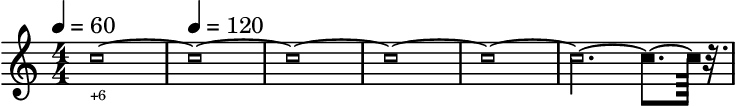

In [3]:
cl = Clip("../snd/piano-pitchtest-Cmaj.flac", speed=0.75)
cl

The tempo of the score does not affect a clip's playback

In [4]:
cl.play()

using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:_clip_diskin=401.0002 start=.169 dur=13.906 kpos=0 kgain=1 idataidx_=21 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ipath=../snd/piano-pitchtest-Cmaj.flac isndfilechan=-1 kspeed=0.75 iskip=0 iwrap=0 iwinsize=4 p21=0 p22=72.0623 …)

In [5]:
float(cl.dur)

23.8118216175359

In [6]:
ev = cl.play()
ev.automate('speed', (0, 0.25, cl.dur, 2))
ev

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:_clip_diskin=401.0003 start=6.441 dur=13.906 kpos=0 kgain=1 idataidx_=21 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ipath=../snd/piano-pitchtest-Cmaj.flac isndfilechan=-1 kspeed=0.75 iskip=0 iwrap=0 iwinsize=4 p21=0 p22=72.0623 …)

OfflineRenderer(sr=44100)
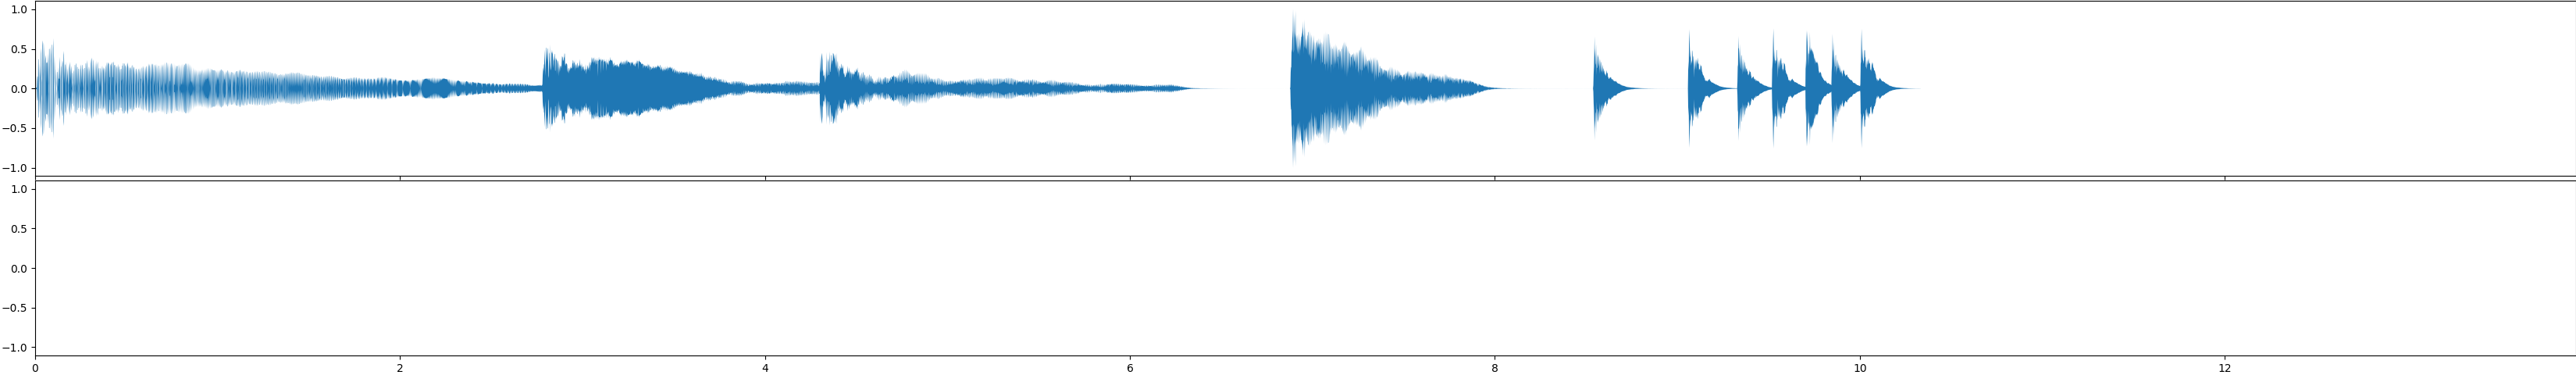

In [7]:
with render(show=True):
    ev = cl.play()
    ev.automate('speed', (0, 0.25, cl.dur*0.5, 2))


In [8]:
# This might result in unsynched playback, see below for the correct way

n = Note("7c", 0.5)

samp = cl.asSample()

n.play(fade=0)
gr2 = cl.play(position=0)
gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
n.play(fade=0, delay=4)
gr2.set(speed=0.5, delay=4)
sampsynth = samp.play(engine=w.audioSession().engine)
sampsynth.synth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
sampsynth.synth.set(speed=0.5, delay=4)
    


In [9]:
n = Note("7c", 1)

samp = cl.asSample()

with play() as s:
    gr1 = n.play(fade=0)
    gr2 = cl.play(position=0)
    gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
    n.play(fade=0, delay=4)
    gr2.set(speed=0.5, delay=4)
    sampsynth = s.playSample(samp)
    sampsynth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
    sampsynth.set(speed=0.5, delay=4)
    
s

Button(description='Stop', style=ButtonStyle())

Output()

OfflineRenderer(sr=44100)
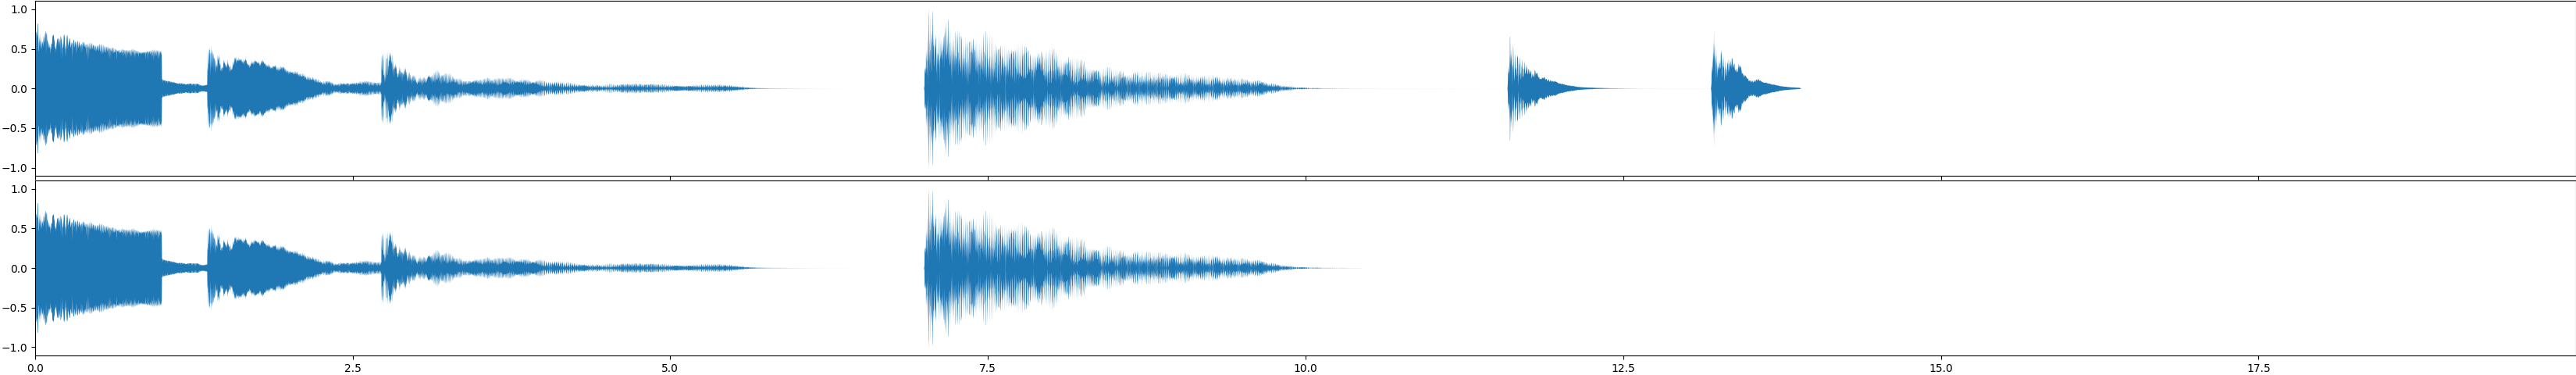

In [10]:
n = Note("7c", 1)

samp = cl.asSample()
session = getWorkspace().audioSession()

with render(endtime=20) as r:
    gr1 = n.play(fade=0)
    gr2 = cl.play(position=0)
    gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
    gr2.set(speed=0.5, delay=4)
    sampsynth = r.playSample((samp.samples, samp.sr), pos=1)
    sampsynth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
    sampsynth.set(speed=0.5, delay=4)
    
r

## Test sample rate

In [11]:
from maelzel.core import *
cl = Clip("../snd/voiceover-fragment-48k.flac")

mnOut size: 24
m_pitchTrack size: 24


Clip(source=../snd/voiceover-fragment-48k.flac, numChannels=1, sr=48000, dur=13.853, sourcedur=8.926s)
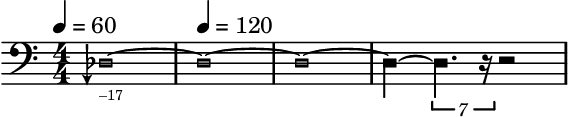

In [12]:
cl

In [13]:
cl.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:_clip_diskin=401.0006 start=84.435 dur=8.926 kpos=0 kgain=1 idataidx_=21 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ipath=../snd/voiceover-fragment-48k.flac isndfilechan=-1 kspeed=1 iskip=0 iwrap=0 iwinsize=4 p21=0 p22=48.8273 …)

In [14]:

s = Sample("../snd/voiceover-fragment-48k.flac")
s = s.getChannel(0, contiguous=True)
cl2 = Clip((s.samples, s.sr))


In [15]:
s.samples, s.sr

(array([2.39990234e-01, 2.32574463e-01, 2.15820312e-01, ...,
        1.22070312e-04, 2.13623047e-04, 1.52587891e-04], shape=(428461,)),
 48000)

mnOut size: 24
m_pitchTrack size: 24


Clip(source=[2.39990234e-01 2.32574463e-01 2.15820312e-01 ... 1.22070312e-04
 2.13623047e-04 1.52587891e-04], numChannels=1, sr=48000, dur=13.853, sourcedur=8.926s)
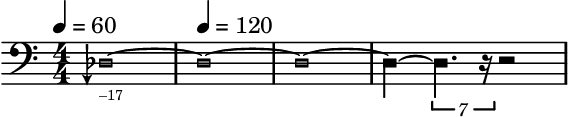

In [16]:
cl2

In [17]:
cl2.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:_playtable=405.0002 start=98.307 dur=8.926 kpos=0 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 isndtab=102 istart=0 kspeed=1 ixfade=-1 p19=0 p20=48.8273 p21=1 p22=8.92627 …)

In [18]:
s3 = Sample("../snd/voiceover-fragment-96k.flac")
s3 = s3.getChannel(0, contiguous=True)
cl3 = Clip((s3.samples, s3.sr))
cl3.play()


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:_playtable=405.0003 start=101.667 dur=8.926 kpos=0 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 isndtab=103 istart=0 kspeed=1 ixfade=-1 p19=0 p20=0 p21=1 p22=8.92627 …)

In [19]:
s3.firstPitch()

mnOut size: 24
m_pitchTrack size: 24


(0.042697916999999995, 61.73500061035156)

In [20]:
s3.play()

Button(description='Stop', style=ButtonStyle())

Output()